# Manuscript Figures

---

In [1]:
import importlib

In [2]:
import matplotlib

In [3]:
matplotlib.use('Agg')

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

In [6]:
import networkx as nx

In [7]:
import numpy as np

In [8]:
import os

In [9]:
import pandas as pd

In [10]:
from sklearn import metrics

---

## Figure 1

**2015 December 11, 24-25**

Workflow schematic.

An example functional gene network *Figure 1 net.cys* was constructed in Cytoscape. A ROC curve for genetic interaction predictability is to be constructed from this network. The set of interactors &Omega; = {gene A, gene B, gene C, gene M}. To find the LLS score of genes connected to &Omega;, convert the edge list to an adjacency matrix and calculate AUC:

In [38]:
G = nx.read_weighted_edgelist('Figure 1 edgelist.csv', delimiter=',')
A = nx.to_pandas_dataframe(G)
seeds = ['gene A', 'gene B', 'gene C', 'gene M']
llsSum = A.loc[seeds,:].sum(axis=0)
trueLabels = pd.Series([0]*llsSum.size, index=llsSum.index)
trueLabels.loc[seeds] = 1
fpr, tpr, thresholds = metrics.roc_curve(trueLabels.values, llsSum.values)
rocauc = metrics.auc(fpr, tpr)

Plot ROC curve:

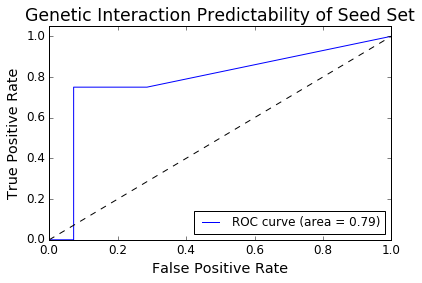

In [39]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %rocauc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize='x-large')
plt.ylabel('True Positive Rate', fontsize='x-large')
plt.title('Genetic Interaction Predictability of Seed Set', fontsize='xx-large')
plt.tick_params(labelsize='large')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('Figure 1 ROC.svg')
plt.show()

## Figure 2

**2015 December 14**

Human genetic interaction predictability AUC plots, with functional networks cluster for high AUC seed genes.

In [9]:
os.chdir(os.path.join('..', 'src'))

In [10]:
import func_net_pred

In [11]:
netfile = 'H6Net_CC.net'

In [58]:
experimentSys = 'Phenotypic Suppression'

In [13]:
biogridfile = 'BIOGRID-3.4.130-human.txt'

Get predictive seed sets:

In [59]:
node2edgewt = func_net_pred.process_func_net(netfile)
gene2idx = func_net_pred.assign_gene_indices(node2edgewt)
adjMat = func_net_pred.build_netwk_adj_matrix(node2edgewt, gene2idx)
seedSets = func_net_pred.read_biogrid(experimentSys, biogridfile)
seedAUC, seed2intacts = func_net_pred.seed_set_predictability(gene2idx, adjMat, seedSets)

Number of genes in interactions: 241


In [60]:
len(seedAUC)

174

Examine which seed to pick:

In [30]:
# phenotypic enhancement
[(seedAUC[i], len(seed2intacts[seedAUC[i][1]])) for i in range(172, 185)]

[((0.82810997707270162, '4654'), 3),
 ((0.83138266400414162, '5599'), 3),
 ((0.85075244649166637, '1387'), 12),
 ((0.87047206967326796, '7006'), 4),
 ((0.8716582562736408, '2033'), 13),
 ((0.91046232085067058, '22938'), 6),
 ((0.97845943347385556, '7031'), 3),
 ((0.98086416329247328, '4088'), 2),
 ((0.98197348715957622, '4087'), 2),
 ((0.98291641244661376, '7124'), 2),
 ((0.98851849797548408, '7704'), 2),
 ((0.98885129513561476, '6047'), 2),
 ((0.99517444117810194, '1950'), 2)]

For phenotypic enhancement, choose Entrez ID 22938.

In [66]:
# phenotypic suppression
[(seedAUC[i], len(seed2intacts[seedAUC[i][1]])) for i in range(130, 146)]

[((0.8163967162192145, '8312'), 3),
 ((0.81998372901412608, '5071'), 3),
 ((0.82673249020042883, '7099'), 3),
 ((0.82766622291250647, '672'), 3),
 ((0.8305876044671251, '22938'), 3),
 ((0.8528595994896544, '7124'), 4),
 ((0.86370444333499752, '4851'), 4),
 ((0.89360923111061796, '7189'), 5),
 ((0.89679906801287024, '835'), 5),
 ((0.8968822811494509, '841'), 5),
 ((0.97882343151938755, '2033'), 4),
 ((0.98397027012036165, '7186'), 2),
 ((0.98458039824726828, '7291'), 2),
 ((0.98740917410838092, '5328'), 2),
 ((0.98821343391203065, '904'), 2),
 ((0.98993288590604023, '5715'), 2)]

For phenotypic suppression, choose Entrez ID 841. 

Read in functional network and write out seed cluster edges for import into Cytoscape:

In [22]:
fnetpath = os.path.join('..', '..', 'DataDownload', 'FunctionalNet', netfile)
fnet = [tuple(line.split('\t')) for line in open(fnetpath)]

In [67]:
seed = '841'
edgeset = set()
for intactor in seed2intacts[seed]:
    edgeset.update([netedge for netedge in fnet if intactor in netedge])

In [68]:
len(edgeset)

438

Clearly, the edge list needs to be pared down.

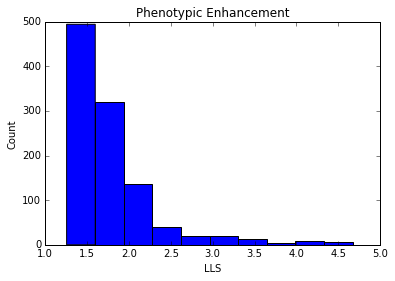

In [57]:
plt.hist([float(edge[2]) for edge in edgeset])
plt.xlabel('LLS')
plt.ylabel('Count')
plt.title('Phenotypic Enhancement')
plt.show()

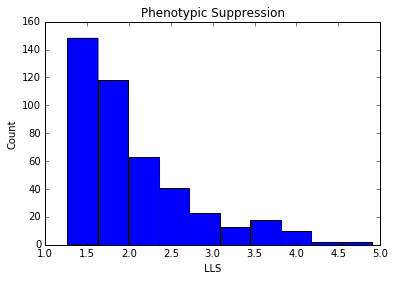

In [69]:
plt.hist([float(edge[2]) for edge in edgeset])
plt.xlabel('LLS')
plt.ylabel('Count')
plt.title('Phenotypic Suppression')
plt.show()

In [70]:
edgelist = [edge for edge in edgeset if float(edge[2]) > 3.0]

In [52]:
len(edgelist)  # phenotypic enhancement

51

In [71]:
len(edgelist)  # phenotypic suppression

53

In [46]:
seed2intacts['22938']  # phenotypic enhancement

['4089', '4087', '4088', '10499', '8106', '8648']

In [72]:
seed2intacts['841']  # phenotypic suppression

['598', '842', '8996', '331', '596']

In [54]:
os.chdir(os.path.join('..', 'doc'))

In [73]:
writefile = open('Figure_2_pheno_suppress_edges.txt', 'w')
writefile.writelines(['\t'.join(edge) for edge in edgelist])
writefile.close()

## Fly Figure

**2015 December 16**

Similar to the figure for the human case above *(NOTE: using BIOGRID v.3.4.127)*. 

In [17]:
importlib.reload(func_net_pred)

<module 'func_net_pred' from '/work/jyoung/genetic_interact/src/func_net_pred.py'>

In [11]:
netfile = 'FlyNetEntrez-noNull.txt'

In [56]:
experimentSys = 'Phenotypic Enhancement'

In [13]:
biogridfile = 'BIOGRID-3.4.127-fly.txt'

Get predictive seed sets *(NOTE: changed read directory of functional net file in process_func_net( ) from func_net_pred.py)*:

In [57]:
node2edgewt = func_net_pred.process_func_net(netfile)
gene2idx = func_net_pred.assign_gene_indices(node2edgewt)
adjMat = func_net_pred.build_netwk_adj_matrix(node2edgewt, gene2idx)
seedSets = func_net_pred.read_biogrid(experimentSys, biogridfile)
seedAUC, seed2intacts = func_net_pred.seed_set_predictability(gene2idx, adjMat, seedSets)

Number of genes in interactions: 755


Choose seed by examining the *Fly_PhenotypicEnhancement_seed_sets.txt* and *Fly_PhenotypicSuppression_seed_sets.txt* files. Looking for high AUCs (but not approximately 1.0) with a relatively sizeable number of interactors. For phenotypic enhancement, go with the "thickveins" gene (Entrez ID 33753). For phenotypic suppression, go with the "fused" gene (Entrez ID 32855). 

In [58]:
len(seed2intacts['33753'])

10

In [59]:
next(t for t in seedAUC if t[1]=='33753')

(0.98115319736236772, '33753')

Read in functional network and write out seed cluster edges for import into Cytoscape:

In [29]:
fnetpath = os.path.join('..', 'data', netfile)
fnet = [tuple(line.split('\t')) for line in open(fnetpath)]

In [60]:
seed = '33753'
edgeset = set()
for intactor in seed2intacts[seed]:
    edgeset.update([netedge for netedge in fnet if intactor in netedge])

In [61]:
len(edgeset)

4593

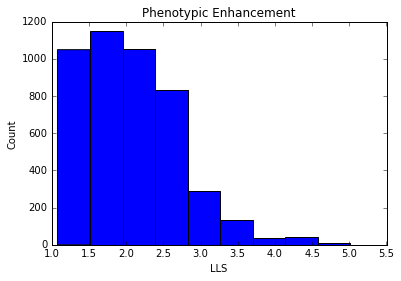

In [36]:
plt.hist([float(edge[2]) for edge in edgeset])
plt.xlabel('LLS')
plt.ylabel('Count')
plt.title('Phenotypic Enhancement')
plt.show()

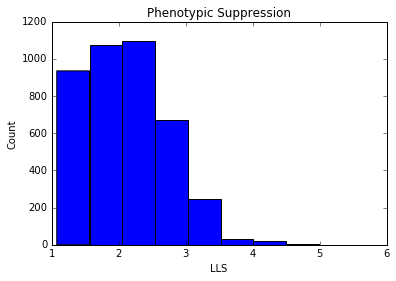

In [51]:
plt.hist([float(edge[2]) for edge in edgeset])
plt.xlabel('LLS')
plt.ylabel('Count')
plt.title('Phenotypic Suppression')
plt.show()

In [62]:
edgelist = [edge for edge in edgeset if float(edge[2]) > 4.0]

In [63]:
len(edgelist)  # phenotypic enhancement

57

In [53]:
len(edgelist)  # phenotypic suppression

28

In [64]:
print(seed2intacts['33753'])

['38494', '36171', '33432', '38168', '31293', '40958', '45908', '32256', '41772', '37778']


In [54]:
print(seed2intacts['32855'])

['42737', '31379', '35653', '41565', '35851', '40958', '45908', '43767']


In [41]:
os.chdir(os.path.join('..', 'doc'))

In [55]:
writefile = open('Fly_figure_pheno_suppress_edges.txt', 'w')
writefile.writelines(['\t'.join(edge) for edge in edgelist])
writefile.close()